# ANN for regression, exercise project 1 - Diamonds

## Dependancies

In [32]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [33]:
df = pd.read_csv("data/diamonds.csv")

In [34]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df = df.drop("Unnamed: 0", axis=1)

In [36]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Categorial variables

The dataset appears to have a few categorial variables, but looking at the notes of the original uploader of the dataset, it is implied that they are ordinal categories.

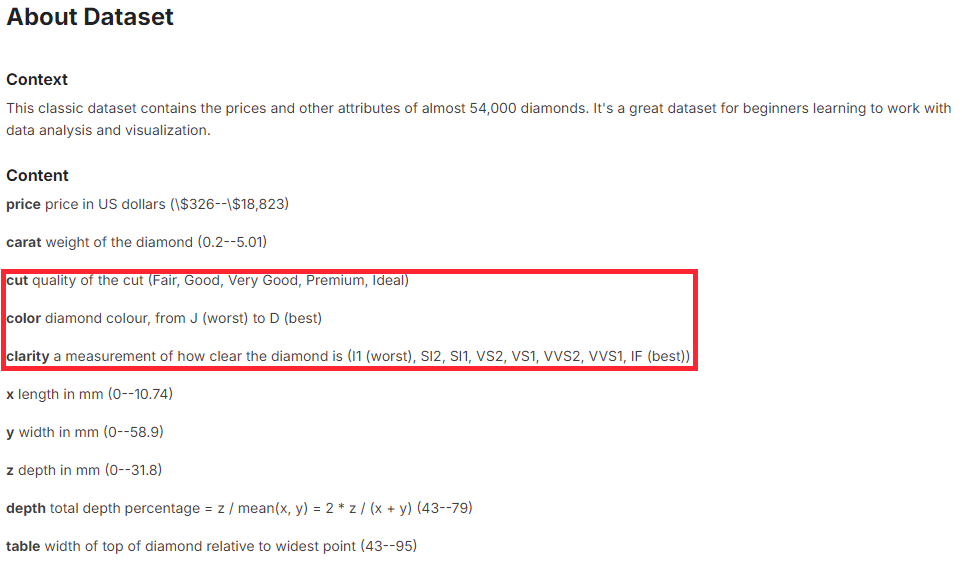

In [37]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [38]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [39]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [40]:
# Defining the map function
def binary_map_cut(x):
    return x.map({"Fair": 0, "Good": 1, "Very Good": 2, "Premium":3, "Ideal":4})

# Defining the map function
def binary_map_color(x):
    return x.map({"J": 0, "I": 1, "H": 2, "G": 3, "F":4, "E":5, "D":6})

# Defining the map function
def binary_map_clarity(x):
    return x.map({"I1":0, "SI2":1,"SI1":2,"VS2":3,"VS1":4,"VVS2":5,"VVS1":6,"IF":7})

# Applying the function to the housing list
df[["cut"]] = df[["cut"]].apply(binary_map_cut)
df[["color"]] = df[["color"]].apply(binary_map_color)
df[["clarity"]] = df[["clarity"]].apply(binary_map_clarity)

In [41]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
